tesseract 5.3.4
 leptonica-1.84.1
  libgif 5.2.1 : libjpeg 8d (libjpeg-turbo 3.0.0) : libpng 1.6.40 : libtiff 4.6.0 : zlib 1.2.12 : libwebp 1.3.2 : libopenjp2 2.5.0
 Found NEON
 Found libarchive 3.7.2 zlib/1.2.12 liblzma/5.4.4 bz2lib/1.0.8 liblz4/1.9.4 libzstd/1.5.5
 Found libcurl/8.4.0 SecureTransport (LibreSSL/3.3.6) zlib/1.2.12 nghttp2/1.58.0


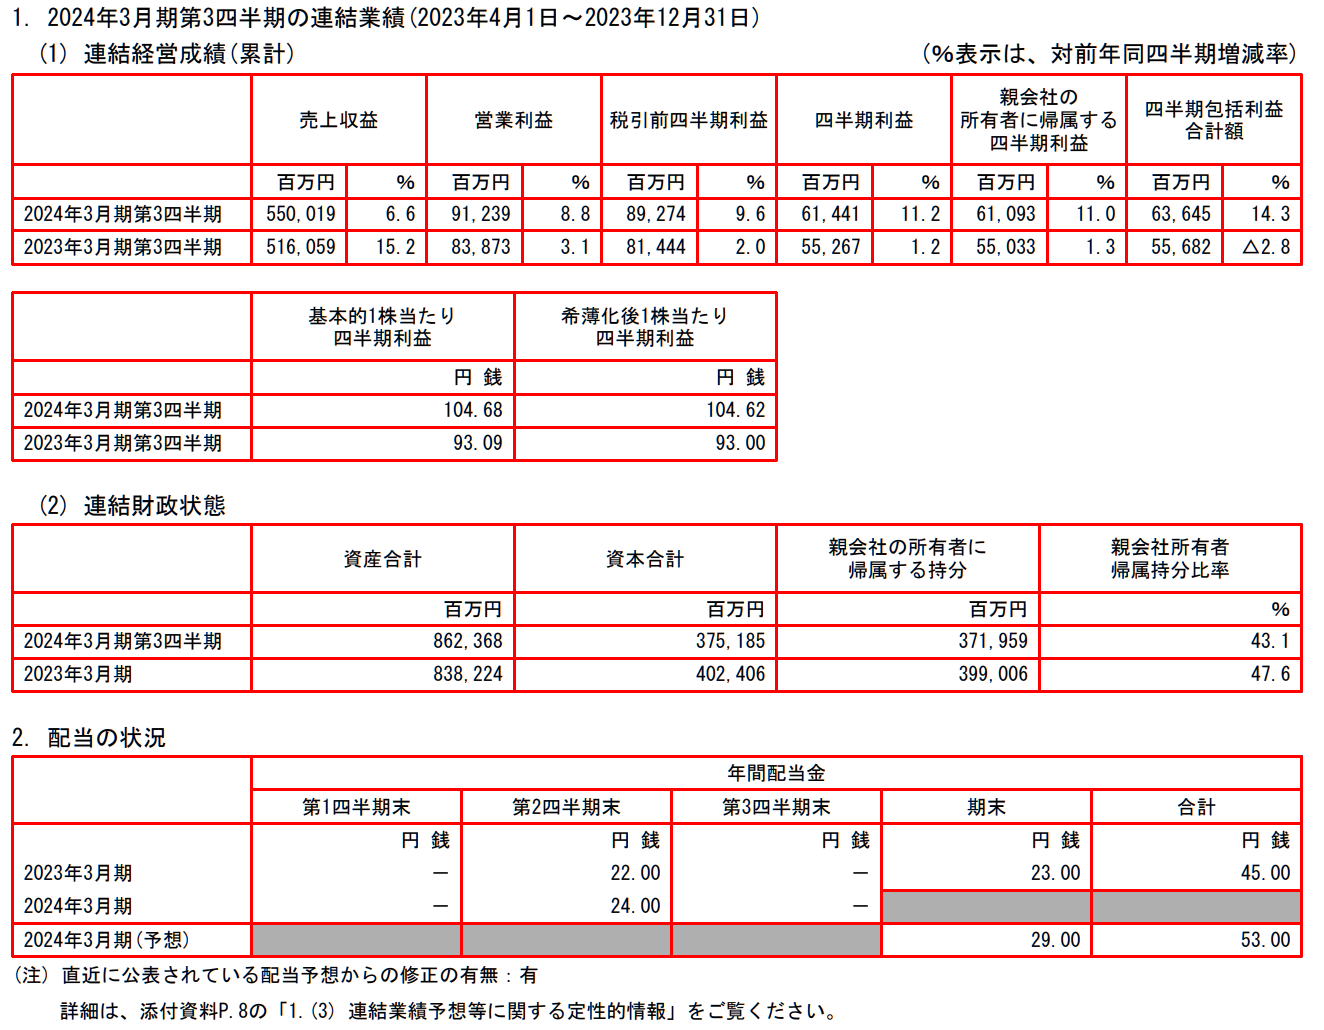

In [52]:
import diff_match_patch

from IPython.display import display_html
from PIL import Image as PILImage
from openpyxl import load_workbook
from io import BytesIO
import cv2

from img2table.ocr import TesseractOCR
from img2table.document import Image


import webbrowser



PWD = '/Users/satoki252595/work/20240114_nriocr2'

PATH_IMAGE = PWD + '/static/image/'
PATH_TEXT = PWD + '/static/text/'

def getImageTable(img_path):
    
    # Instantiation of OCR
    ocr = TesseractOCR(n_threads=6, lang="jpn")

    # Instantiation of document, either an image or a PDF
    doc = Image(src = img_path)

    # Table extraction
    extracted_tables = doc.extract_tables(ocr=ocr,
                                        implicit_rows=True,
                                        borderless_tables=True,
                                        min_confidence=50)
    
    return extracted_tables


    
extracted_tables = getImageTable(PATH_IMAGE + '4307.png')

# Display extracted tables
table_img = cv2.imread(PATH_IMAGE + '4307.png')

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
            
PILImage.fromarray(table_img)
    

In [51]:
tables[3].df

,0,1,2,3,4,5
0,None,年 間 配当 金,年 間 配当 金,年 間 配当 金,年 間 配当 金,年 間 配当 金
1,None,第 1 四半 期末,第 2 四半 期末,第 3 四半 期末,期末,合計
2,2023 年 3 月 期\n2024 年 3 月 期,円\nー\nー,円\n22.00\n24.00,円\nー\nー,円\n23.00,円\n45.00
3,2023 年 3 月 期\n2024 年 3 月 期,円\nー\nー,円\n22.00\n24.00,円\nー\nー,None,None
4,2024 年 3 月 期 予 想 ),None,None,None,29.00,53.00


In [33]:
from PIL import Image as PILImage

img = Image(src=PATH_IMAGE + '4307.png')

# Extract tables
extracted_tables = img.extract_tables(implicit_rows=True,borderless_tables=True)

extracted_tables



[ExtractedTable(title=None, bbox=(12, 74, 1301, 264),shape=(4, 13)),
 ExtractedTable(title=None, bbox=(12, 292, 776, 460),shape=(4, 3)),
 ExtractedTable(title=None, bbox=(12, 524, 1301, 691),shape=(4, 5)),
 ExtractedTable(title=None, bbox=(12, 756, 1301, 956),shape=(5, 6))]

In [38]:
extracted_tables[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None


In [55]:
img = Image(PATH_IMAGE + '4307.png')
tesseract = TesseractOCR()

# Extract tables with Tesseract and PaddleOCR
tables = img.extract_tables(ocr=TesseractOCR(n_threads=20, lang="jpn"), implicit_rows=True,borderless_tables=True)

tables

tesseract 5.3.4
 leptonica-1.84.1
  libgif 5.2.1 : libjpeg 8d (libjpeg-turbo 3.0.0) : libpng 1.6.40 : libtiff 4.6.0 : zlib 1.2.12 : libwebp 1.3.2 : libopenjp2 2.5.0
 Found NEON
 Found libarchive 3.7.2 zlib/1.2.12 liblzma/5.4.4 bz2lib/1.0.8 liblz4/1.9.4 libzstd/1.5.5
 Found libcurl/8.4.0 SecureTransport (LibreSSL/3.3.6) zlib/1.2.12 nghttp2/1.58.0
tesseract 5.3.4
 leptonica-1.84.1
  libgif 5.2.1 : libjpeg 8d (libjpeg-turbo 3.0.0) : libpng 1.6.40 : libtiff 4.6.0 : zlib 1.2.12 : libwebp 1.3.2 : libopenjp2 2.5.0
 Found NEON
 Found libarchive 3.7.2 zlib/1.2.12 liblzma/5.4.4 bz2lib/1.0.8 liblz4/1.9.4 libzstd/1.5.5
 Found libcurl/8.4.0 SecureTransport (LibreSSL/3.3.6) zlib/1.2.12 nghttp2/1.58.0


[ExtractedTable(title=2024 年 3 月 期 第 3 四半 期 の 連結 業績 (2023 年 4 月 1 日 2023 年 12 月 31 日 )
 1
 (1) 連結 経営 成績 (累計 )
 (% 表 示 は 、 対 前 年 同 四半 期 増 減 率 ), bbox=(12, 74, 1301, 264),shape=(4, 13)),
 ExtractedTable(title=None, bbox=(12, 292, 776, 460),shape=(4, 3)),
 ExtractedTable(title=(2) 連結 財政 状態, bbox=(12, 524, 1301, 691),shape=(4, 5)),
 ExtractedTable(title=2. 配当 の 状況, bbox=(12, 756, 1301, 956),shape=(5, 6))]

In [56]:
tables[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,売上 収益,売上 収益,営業 利益,営業 利益,税 引 前 四半 期 利 益,税 引 前 四半 期 利 益,四半 期 利 益,四半 期 利 益,会 社 の\n所 有 者 に 帰属 する\n四半 期 利 益,会 社 の\n所 有 者 に 帰属 する\n四半 期 利 益,四半 期 包括 利益,四半 期 包括 利益
1,None,百 円,None,百 円,%,百 円,%,百 円,%,百 円,None,百 円,None
2,2024 年 3 月 期 第 3 四半,"550,019",6.6,91.239,8.8,89.274,9.6,61.441,None,61.093,11.0,63.645,14.3
3,2023 年 3 月 期 第 3 四半 期,"516,059",15.2,83.873,3.1,81.444,2.0,None,も,55.033,1.3,55.682,None


In [ ]:
def getImageTable_azuru(img_path):
    
    # Instantiation of OCR
    ocr = TesseractOCR(n_threads=1, lang="jpn")

    # Instantiation of document, either an image or a PDF
    doc = Image(src = img_path)

    # Table extraction
    extracted_tables = doc.extract_tables(ocr=ocr,
                                        implicit_rows=True,
                                        borderless_tables=True,
                                        min_confidence=50)
    
    return extracted_tables